# GRIP @ The Sparks Foundation

## Data Science & Business Analytics Intern¶

## Author : Imen Frikha

## Task 2 : Prediction using Unsupervised ML

**In this task it is required to predict the optimum number of clusters from the 'Iris' dataset and represent it visually using The K- Means Clustering.**

## Importing required libraries

In [1]:
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

## Reading 'Iris' dataset

In [2]:
iris = pd.read_csv("iris.csv")

## Exploring data

In [3]:
# Get the first 5 rows
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Get the last 5 rows
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Get the number of rows and columns
iris.shape

(150, 6)

In [6]:
# Get information about a DataFrame including the index dtype and columns, non-null values and memory usage.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Generate descriptive statistics. 
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# Names of all coumns.
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# Drop the 'Id' and 'Species' columns.
iris_df=iris.drop(columns=['Species','Id'])

In [11]:
# Get the first 5 rows
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visualizing the distribution and range of features .¶

In [12]:
def plot(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=iris_df,x=feature,ax=axes[0])
    sns.distplot(a=iris_df[feature],ax=axes[1],color='#e2674b')
    fig.set_size_inches(15,5)

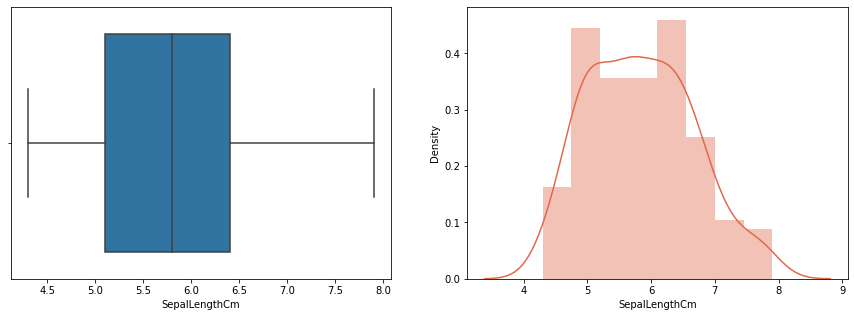

In [13]:
plot('SepalLengthCm')

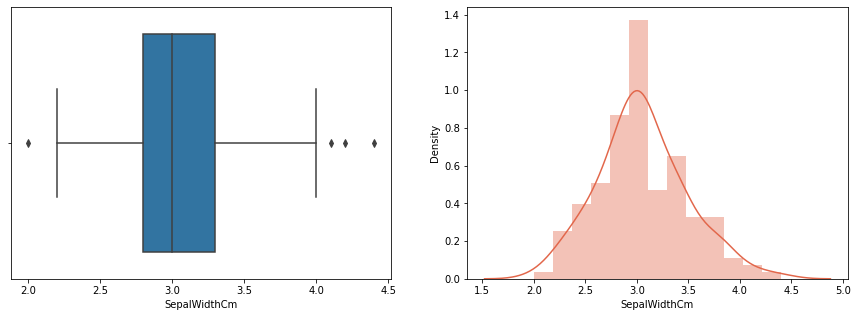

In [14]:
plot('SepalWidthCm')

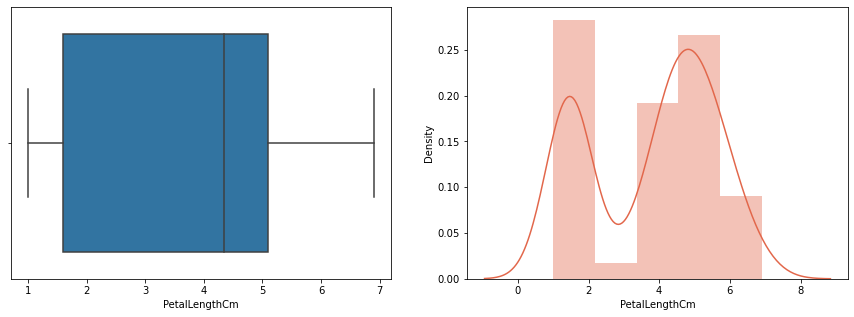

In [15]:
plot('PetalLengthCm')

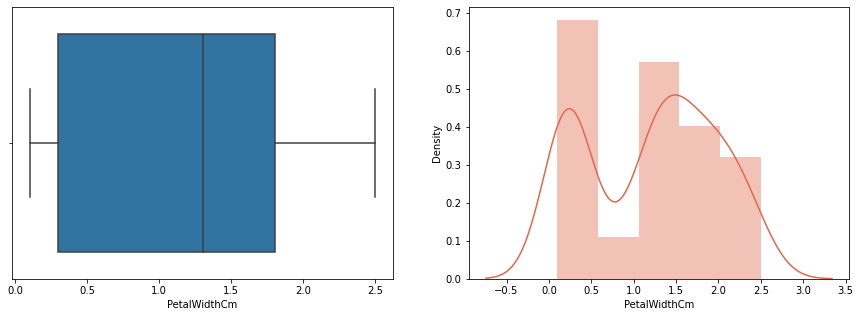

In [16]:
plot('PetalWidthCm')

## How do you find the optimum number of clusters for K Means?
## How does one determine the value of K?

In [17]:
# Calculating the Within cluster sum of squares 'wcss'
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris_df)
    wcss.append(kmeans.inertia_)  

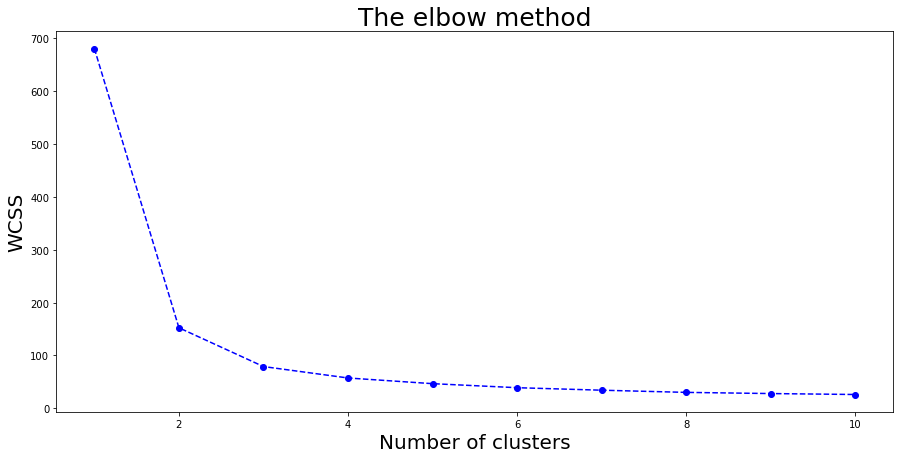

In [18]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize=(15, 7))
plt.plot(range(1, 11), wcss,'go--',color='blue')
plt.title('The elbow method',fontsize=25)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('WCSS',fontsize=20) 
plt.show()

**You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.**

**From this we choose the number of clusters as '3'.**

## Applying k means clustering on the data

In [19]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = model.fit_predict(iris_df)

## Visualising the clusters 

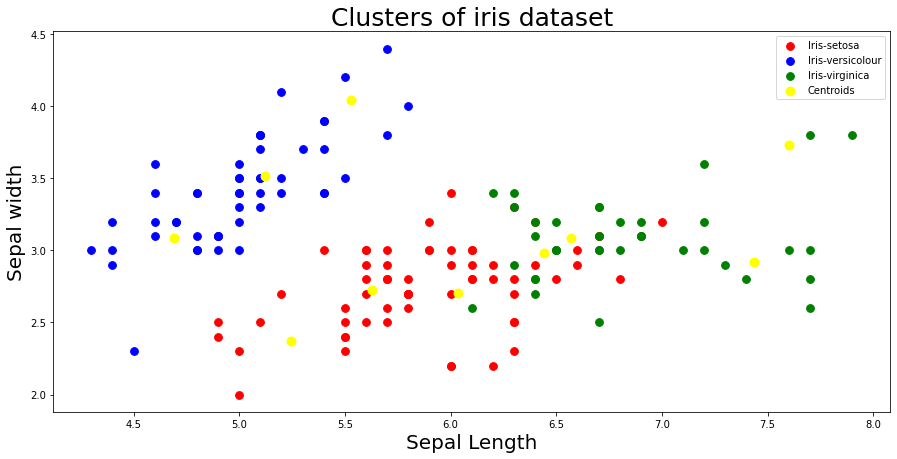

In [20]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.figure(figsize=(15, 7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 60, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 80, c = 'yellow', label = 'Centroids')
plt.title('Clusters of iris dataset',fontsize=25)
plt.xlabel('Sepal Length',fontsize=20)
plt.ylabel('Sepal width',fontsize=20) 
plt.legend()
plt.show()

## Thank you